In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
import seaborn as sns
import pandas as pd

# 아이리스 데이터셋 로드
iris = load_iris()

X = iris.data
y = iris.target

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

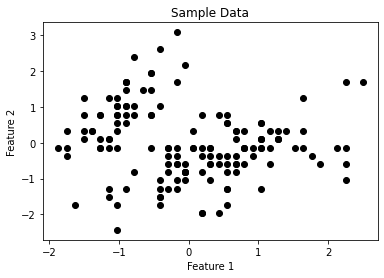

In [8]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='black', marker='o')
plt.title('Sample Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

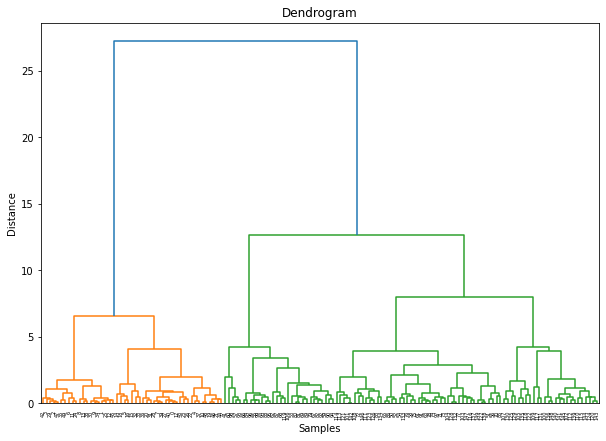

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 계층적 군집화 수행
Z = linkage(X_scaled, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

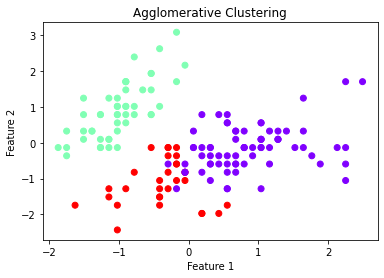

In [11]:
from sklearn.cluster import AgglomerativeClustering

# 계층적 군집화 모델 생성
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# 모델 피팅 및 클러스터 예측
labels = model.fit_predict(X_scaled)

# 클러스터 결과 시각화
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

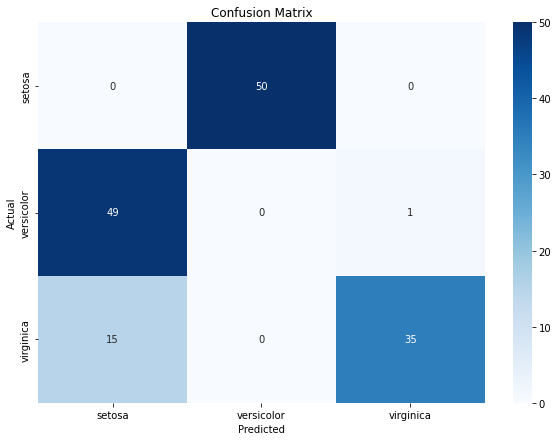

In [13]:
# 계층적 군집화 모델 생성
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# 모델 피팅 및 클러스터 예측
labels = model.fit_predict(X)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(y, labels)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# 정확도 계산
accuracy = accuracy_score(y, labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 23.33%
